In [1]:
# Import packages
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svawe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Regular Expressions

https://www.w3schools.com/python/python_regex.asp

In [2]:
import re

#txt = "Spring 2022 in Northern Hemisphere began on Sunday, 20 March and ends on Tuesday, 21 June."

txt = "In 2022, the March equinox happens on \nSunday, March 20, at 11:33 A.M. EDT. This marks the return of spring to the Northern Hemisphere.The word equinox comes from the Latin words for equal night—aequus (equal) and nox (night)."

print(re.findall("March", txt))
#The dot ( . ) represents any character.
print(re.findall("M...h", txt))
# We specify a range of characters by enclosing them within square brackets ( [ ] ).
print(re.findall("[Mm]ar[ck][hs]", txt))
# "or" = |
print(re.findall("March|Sunday", txt))
#find numbers:
print(re.findall("[0-9][0-9]", txt)) #since we are asking for 2 digits, it only returns two-digit numbers (and splits 2022 -> 20, 22)
print(re.findall("[0-9]+", txt)) #gives numbers of various lengths
print(re.findall("[0-9][0-9]:[0-9][0-9]", txt))#patterns the : between the numbers -> for time its HH:MM
#starts with 
print(re.findall("^S.*", txt)) #doesnt work because it works on line basis

['March', 'March']
['March', 'March']
['March', 'March', 'marks']
['March', 'Sunday', 'March']
['20', '22', '20', '11', '33']
['2022', '20', '11', '33']
['11:33']
[]


In [3]:
#^ Starts with
[print(re.findall("^S.*", s)) for s in txt.split() if re.findall("^S.*", s) != []]

['Sunday,']


[None]

In [4]:
#multiline mode = (?m)
print(re.findall("(?m)^S.*", txt))

['Sunday, March 20, at 11:33 A.M. EDT. This marks the return of spring to the Northern Hemisphere.The word equinox comes from the Latin words for equal night—aequus (equal) and nox (night).']


In [5]:
#txt.split()
re.split("\s",txt)

['In',
 '2022,',
 'the',
 'March',
 'equinox',
 'happens',
 'on',
 '',
 'Sunday,',
 'March',
 '20,',
 'at',
 '11:33',
 'A.M.',
 'EDT.',
 'This',
 'marks',
 'the',
 'return',
 'of',
 'spring',
 'to',
 'the',
 'Northern',
 'Hemisphere.The',
 'word',
 'equinox',
 'comes',
 'from',
 'the',
 'Latin',
 'words',
 'for',
 'equal',
 'night—aequus',
 '(equal)',
 'and',
 'nox',
 '(night).']

In [6]:
#anything but
print(re.findall("[^S.*]", txt))

['I', 'n', ' ', '2', '0', '2', '2', ',', ' ', 't', 'h', 'e', ' ', 'M', 'a', 'r', 'c', 'h', ' ', 'e', 'q', 'u', 'i', 'n', 'o', 'x', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 's', ' ', 'o', 'n', ' ', '\n', 'u', 'n', 'd', 'a', 'y', ',', ' ', 'M', 'a', 'r', 'c', 'h', ' ', '2', '0', ',', ' ', 'a', 't', ' ', '1', '1', ':', '3', '3', ' ', 'A', 'M', ' ', 'E', 'D', 'T', ' ', 'T', 'h', 'i', 's', ' ', 'm', 'a', 'r', 'k', 's', ' ', 't', 'h', 'e', ' ', 'r', 'e', 't', 'u', 'r', 'n', ' ', 'o', 'f', ' ', 's', 'p', 'r', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'N', 'o', 'r', 't', 'h', 'e', 'r', 'n', ' ', 'H', 'e', 'm', 'i', 's', 'p', 'h', 'e', 'r', 'e', 'T', 'h', 'e', ' ', 'w', 'o', 'r', 'd', ' ', 'e', 'q', 'u', 'i', 'n', 'o', 'x', ' ', 'c', 'o', 'm', 'e', 's', ' ', 'f', 'r', 'o', 'm', ' ', 't', 'h', 'e', ' ', 'L', 'a', 't', 'i', 'n', ' ', 'w', 'o', 'r', 'd', 's', ' ', 'f', 'o', 'r', ' ', 'e', 'q', 'u', 'a', 'l', ' ', 'n', 'i', 'g', 'h', 't', '—', 'a', 'e', 'q', 'u', 'u', 's', ' ', '(', 'e', 'q'

# Text Analysis and Preprocessing

## Gutenberg

In [ ]:
!pip install gutenberg

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

In [ ]:
text = strip_headers(load_etext(42671)).strip()
#text = load_etext(42671)
print(text)

### Tasks

1. Compute the term frequencies
2. Inspect the top 20
3. Verify Zipf's law
4. Think about useful text preprocessing
5. Repeat with your favorite book from Gutenberg

Extras
1. Find all dates menioned in the book
2. Count the number of positive and negative words using one of the sentiment dictionaries provided

Take a look at the following useful gensim functions 

* strip_tags
* strip_numeric
* strip_punctuation 
* strip_multiple_whitespaces 
* remove_stopwords
* strip_short
* stem_text

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
text_split = text.split()

In [100]:
wordlist = np.unique(text_split, return_counts= True)[0]
counts = np.unique(text_split, return_counts= True)[1]
combined = list(zip(wordlist, counts))

In [204]:
df1 = pd.DataFrame(combined, columns = ["word","frequency"])
df1 = df1.sort_values("frequency", ascending = False)
df1.reset_index(inplace = True)
df1 = df1.drop(columns = "index")
df1.index = df1.index +1
df1.reset_index(inplace = True)
df1.head()

,index,word,frequency
0,1,the,4062
1,2,to,4045
2,3,of,3579
3,4,and,3282
4,5,a,1874


In [205]:
sum(df1.frequency)

121961

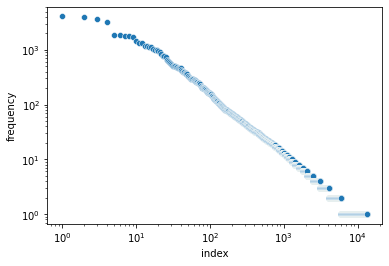

In [103]:
sns.scatterplot(x = "index", y = "frequency", data = df)
plt.yscale("log")
plt.xscale("log")

In [115]:
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import regex as re

In [133]:
text2 = text.lower()
text2 = remove_stopwords(text2)
text_split2 = text2.split()

In [134]:
wordlist = np.unique(text_split2, return_counts= True)
df2 = pd.DataFrame(wordlist).transpose()
df2.columns = ["word","frequency"]

In [141]:
sum(df2.frequency)/sum(df.frequency)

0.43023589508121446

In [266]:
def tf(text):
    text = text.lower()
    text = remove_stopwords(text)
    text = strip_punctuation(text)
    text = strip_tags(text)
    text = strip_numeric(text)
    text = strip_multiple_whitespaces(text)
    text = strip_short(text)
    text_split = text.split()
    wordlist = np.unique(text_split, return_counts= True)
    df = pd.DataFrame(wordlist).transpose()
    df.columns = ["word","frequency"]
    df = df.sort_values("frequency", ascending = False)
    df.reset_index(inplace = True)
    df = df.drop(columns = "index")
    df["frequency"] = df["frequency"].astype(int)
    return df

In [267]:
df3 = tf(text)
df3.head()

,word,frequency
0,elizabeth,634
1,darcy,418
2,said,402
3,mrs,342
4,you,329


In [268]:
sum(df3.frequency)/sum(df1.frequency), sum(df3.frequency)

(0.4129188839055108, 50360)

In [272]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6203 entries, 0 to 6202
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   word       6203 non-null   object 
 1   frequency  6203 non-null   int32  
 2   sentiment  1420 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 169.6+ KB


In [278]:
bing = pd.read_csv(r"C:\Users\svawe\Downloads\SentimentDictionaries\bing.csv").drop(columns = ["Unnamed: 0"])
sentiment = df3.merge(bing, how = "inner", on = "word")
senti_map = {"negative" : -1, "positive": 1}
sentiment["sentiment"] = sentiment["sentiment"].map(senti_map)
sentiment["sentiment_weighed"] = sentiment["frequency"] * sentiment["sentiment"]

In [279]:
sentiment.head()

,word,frequency,sentiment,sentiment_weighed
0,miss,283,-1,-283
1,good,203,1,203
2,great,142,1,142
3,well,105,1,105
4,pleasure,93,1,93


In [281]:
np.mean(sentiment.sentiment_weighed)

0.8549295774647887

# 1. Import and examine data

In [ ]:
# Import dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [ ]:
# Examine dataset
print('Possible tagret values:')
print(df.target_names.unique())
print(' ')
print('Class distribution:')
print(df.target_names.value_counts())

Possible tagret values:
['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']
 
Class distribution:
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 48

*The classes are almost uniformly distributed.*

In [ ]:
print(df.content[0])
df.content[0]

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
re.findall('(?m)^(From:|Article-I.D.:|Organization:|Lines:|Nntp-Posting-Host:|Distribution:|Reply-To:|X-Newsreader:|Expires:|\s*-+)', df.content[0])

['From:', 'Nntp-Posting-Host:', 'Organization:', 'Lines:', '-', '   ----']

In [199]:
re.search('(?m)^(From:|Article-I.D.:|Organization:|Lines:|Nntp-Posting-Host:|Distribution:|Reply-To:|X-Newsreader:|Expires:)', df.content[0])

<re.Match object; span=(0, 5), match='From:'>

In [200]:
re.sub('(?m)^(From:|Article-I.D.:|Organization:|Lines:|Nntp-Posting-Host:|Distribution:|Reply-To:|X-Newsreader:|Expires:|\s*-+).*\n', '', df.content[0], flags=re.I)

'Subject: WHAT car is this!?\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n\n\n\n\n'